In [14]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras import layers, models


# Image using ANN

Train: (60000, 784) (60000,)
Test : (10000, 784) (10000,)
Epoch 1/10
422/422 ━━━━━━━━━━━━━━━━━━━━ 6s 8ms/step - accuracy: 0.8511 - loss: 0.4965 - val_accuracy: 0.9712 - val_loss: 0.0947
Epoch 2/10
422/422 ━━━━━━━━━━━━━━━━━━━━ 7s 5ms/step - accuracy: 0.9624 - loss: 0.1236 - val_accuracy: 0.9773 - val_loss: 0.0765
Epoch 3/10
422/422 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.9748 - loss: 0.0824 - val_accuracy: 0.9795 - val_loss: 0.0698
Epoch 4/10
422/422 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.9804 - loss: 0.0612 - val_accuracy: 0.9785 - val_loss: 0.0698
Epoch 5/10
422/422 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.9839 - loss: 0.0503 - val_accuracy: 0.9783 - val_loss: 0.0692
Epoch 6/10
422/422 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - accuracy: 0.9872 - loss: 0.0396 - val_accuracy: 0.9787 - val_loss: 0.0768
Epoch 7/10
422/422 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9878 - loss: 0.0356 - val_accuracy: 0.9810 - val_loss: 0.0682
Epoch 8/10
422/422 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms

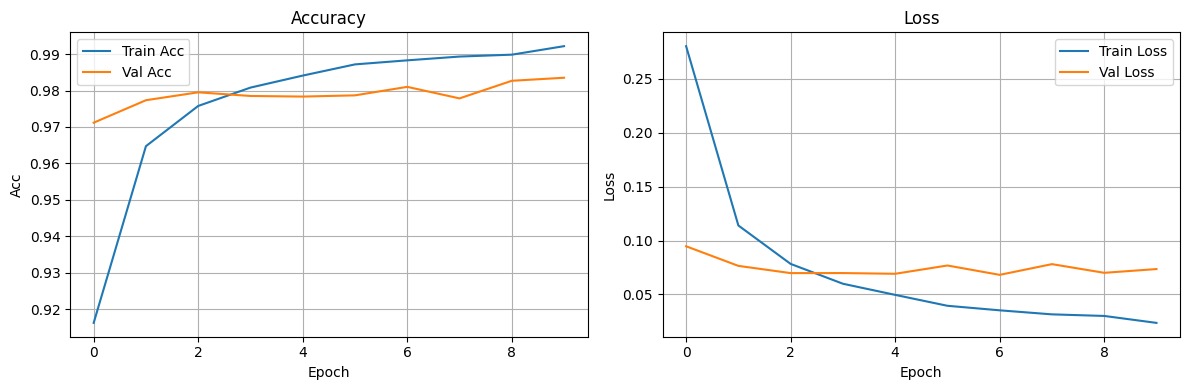

In [28]:
# 1) Load data
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.mnist.load_data()

# 2) Normalize to [0,1]
x_train = x_train.astype("float32") / 255.0
x_test  = x_test.astype("float32") / 255.0

# 3) Flatten to vectors (N, 784) for ANN
x_train_ann = x_train.reshape(-1, 28*28)
x_test_ann  = x_test.reshape(-1, 28*28)

print("Train:", x_train_ann.shape, y_train.shape)
print("Test :", x_test_ann.shape,  y_test.shape)

# 4) Build ANN (MLP)
model = models.Sequential([
    layers.Input(shape=(784,)),
    layers.Dense(512, activation="relu"),
    layers.Dropout(0.2),
    layers.Dense(256, activation="relu"),
    layers.Dropout(0.2),
    layers.Dense(10, activation="softmax")
])

model.compile(optimizer="adam",
              loss="sparse_categorical_crossentropy",
              metrics=["accuracy"])

# 5) Train
history = model.fit(
    x_train_ann, y_train,
    validation_split=0.1,
    epochs=10, batch_size=128, verbose=1
)

# 6) Evaluate
test_loss, test_acc = model.evaluate(x_test_ann, y_test, verbose=0)
print(f"Test acc: {test_acc:.4f} | loss: {test_loss:.4f}")

# 7) Plot history
plt.figure(figsize=(12,4))
plt.subplot(1,2,1)
plt.plot(history.history["accuracy"], label="Train Acc")
plt.plot(history.history["val_accuracy"], label="Val Acc")
plt.title("Accuracy"); plt.xlabel("Epoch"); plt.ylabel("Acc"); plt.grid(True); plt.legend()

plt.subplot(1,2,2)
plt.plot(history.history["loss"], label="Train Loss")
plt.plot(history.history["val_loss"], label="Val Loss")
plt.title("Loss"); plt.xlabel("Epoch"); plt.ylabel("Loss"); plt.grid(True); plt.legend()
plt.tight_layout()
plt.show()


# Using CNN

In [34]:
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.mnist.load_data()

# Normalize & add channel dim
x_train = x_train.astype("float32") / 255.0
x_test  = x_test.astype("float32") / 255.0
x_train = np.expand_dims(x_train, -1)  # (N,28,28,1)
x_test  = np.expand_dims(x_test, -1)


In [16]:
model = models.Sequential([
    layers.Conv2D(32, (3,3), activation="relu", input_shape=(28,28,1), name="conv2d"),
    layers.Conv2D(64, (3,3), activation="relu", name="conv2d_1"),
    layers.MaxPooling2D((2,2), name="max_pooling2d"),
    layers.Conv2D(128, (3,3), activation="relu", name="conv2d_2"),
    layers.Conv2D(128, (3,3), activation="relu", name="conv2d_3"),  # last conv
    layers.MaxPooling2D((2,2), name="max_pooling2d_1"),
    layers.Flatten(name="flatten"),
    layers.Dense(128, activation="relu", name="dense"),
    layers.Dense(10, activation="softmax", name="dense_1")
])

model.compile(optimizer="adam", loss="sparse_categorical_crossentropy", metrics=["accuracy"])
model.fit(x_train, y_train, epochs=2, batch_size=128, validation_split=0.1)

model.summary()


/usr/local/lib/python3.12/dist-packages/keras/src/layers/convolutional/base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/2
422/422 ━━━━━━━━━━━━━━━━━━━━ 12s 21ms/step - accuracy: 0.8778 - loss: 0.4011 - val_accuracy: 0.9860 - val_loss: 0.0503
Epoch 2/2
422/422 ━━━━━━━━━━━━━━━━━━━━ 13s 9ms/step - accuracy: 0.9862 - loss: 0.0437 - val_accuracy: 0.9883 - val_loss: 0.0396


Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 26, 26, 32)     │           320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 24, 24, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 12, 12, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 10, 10, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_3 (Conv2D)               │ (None, 8, 8, 128)      │       147,584 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 4, 4, 128)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 2048)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 128)            │       262,272 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 10)             │         1,290 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 1,511,456 (5.77 MB)

 Trainable params: 503,818 (1.92 MB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 1,007,638 (3.84 MB)

In [26]:
history = model.fit(
    x_train, y_train,
    epochs=10,
    batch_size=128,
    validation_split=0.1,
    verbose=1
)

Epoch 1/10
422/422 ━━━━━━━━━━━━━━━━━━━━ 4s 10ms/step - accuracy: 0.9963 - loss: 0.0102 - val_accuracy: 0.9923 - val_loss: 0.0338
Epoch 2/10
422/422 ━━━━━━━━━━━━━━━━━━━━ 5s 10ms/step - accuracy: 0.9969 - loss: 0.0091 - val_accuracy: 0.9925 - val_loss: 0.0388
Epoch 3/10
422/422 ━━━━━━━━━━━━━━━━━━━━ 5s 9ms/step - accuracy: 0.9977 - loss: 0.0073 - val_accuracy: 0.9928 - val_loss: 0.0364
Epoch 4/10
422/422 ━━━━━━━━━━━━━━━━━━━━ 4s 9ms/step - accuracy: 0.9978 - loss: 0.0068 - val_accuracy: 0.9922 - val_loss: 0.0434
Epoch 5/10
422/422 ━━━━━━━━━━━━━━━━━━━━ 5s 10ms/step - accuracy: 0.9976 - loss: 0.0066 - val_accuracy: 0.9927 - val_loss: 0.0430
Epoch 6/10
422/422 ━━━━━━━━━━━━━━━━━━━━ 4s 10ms/step - accuracy: 0.9982 - loss: 0.0067 - val_accuracy: 0.9885 - val_loss: 0.0577
Epoch 7/10
422/422 ━━━━━━━━━━━━━━━━━━━━ 5s 10ms/step - accuracy: 0.9985 - loss: 0.0047 - val_accuracy: 0.9913 - val_loss: 0.0432
Epoch 8/10
422/422 ━━━━━━━━━━━━━━━━━━━━ 4s 9ms/step - accuracy: 0.9985 - loss: 0.0039 - val_accurac

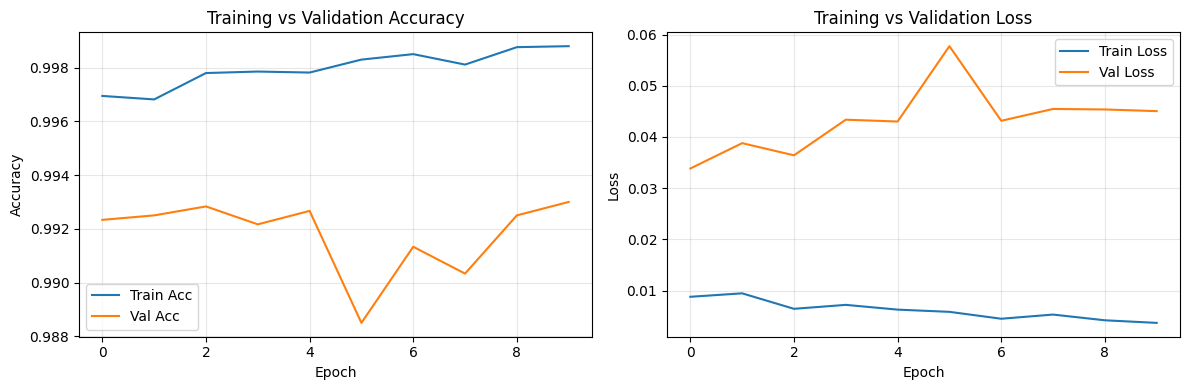

In [27]:
import matplotlib.pyplot as plt

# ---------------- Plot Accuracy ----------------
plt.figure(figsize=(12,4))

plt.subplot(1,2,1)
plt.plot(history.history["accuracy"], label="Train Acc")
plt.plot(history.history["val_accuracy"], label="Val Acc")
plt.xlabel("Epoch")
plt.ylabel("Accuracy")
plt.title("Training vs Validation Accuracy")
plt.legend()
plt.grid(alpha=0.3)

# ---------------- Plot Loss ----------------
plt.subplot(1,2,2)
plt.plot(history.history["loss"], label="Train Loss")
plt.plot(history.history["val_loss"], label="Val Loss")
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.title("Training vs Validation Loss")
plt.legend()
plt.grid(alpha=0.3)

plt.tight_layout()
plt.show()


# Model อื่นๆ

In [39]:
import tensorflow as tf
from tensorflow.keras import applications

# VGG16
vgg16 = applications.VGG16(
    include_top=True,      # ถ้า False จะตัดชั้น Dense ทิ้ง
    weights="imagenet",    # โหลด weight pretrained
    input_shape=(224,224,3)
)

# ResNet50
resnet50 = applications.ResNet50(
    include_top=True,
    weights="imagenet",
    input_shape=(224,224,3)
)

# MobileNetV2
mobilenet = applications.MobileNetV2(
    include_top=True,
    weights="imagenet",
    input_shape=(224,224,3)
)


In [ ]:
# =============== 0) Imports ===============
import numpy as np
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.applications import MobileNetV2
from tensorflow.keras.applications.mobilenet_v2 import preprocess_input
import matplotlib.pyplot as plt

tf.random.set_seed(42)
print("TF:", tf.__version__)


# =============== 1) Load MNIST (28x28x1) ===============
(x_train, y_train), (x_test, y_test) = keras.datasets.mnist.load_data()
# add channel dim -> (H,W,1), keep dtype uint8 (preprocess_input handles 0..255 float)
x_train = x_train[..., None]
x_test  = x_test[..., None]

num_classes = 10
print("Train:", x_train.shape, y_train.shape, " Test:", x_test.shape, y_test.shape)


# =============== 2) tf.data pipeline (resize on-the-fly) ===============
# Use smaller input to save memory. MobileNetV2 also works well at 96x96.
IMG_SIZE = 96
BATCH = 64

def preprocess(image, label):
    # (28,28,1) -> (96,96,3), float32 0..255 -> preprocess_input -> [-1,1]
    image = tf.image.grayscale_to_rgb(tf.cast(image, tf.float32))
    image = tf.image.resize(image, (IMG_SIZE, IMG_SIZE), method="bilinear")
    image = preprocess_input(image)        # scales to [-1,1]
    return image, label

train_ds = tf.data.Dataset.from_tensor_slices((x_train, y_train)) \
          .shuffle(10000) \
          .map(preprocess, num_parallel_calls=tf.data.AUTOTUNE) \
          .batch(BATCH) \
          .prefetch(tf.data.AUTOTUNE)

test_ds  = tf.data.Dataset.from_tensor_slices((x_test, y_test)) \
          .map(preprocess, num_parallel_calls=tf.data.AUTOTUNE) \
          .batch(BATCH) \
          .prefetch(tf.data.AUTOTUNE)


# =============== 3) Build Sequential model (MobileNetV2 backbone) ===============
# Use pretrained weights with include_top=False and add your own head
base = MobileNetV2(
    include_top=False,
    weights="imagenet",
    input_shape=(IMG_SIZE, IMG_SIZE, 3)
)
base.trainable = False  # freeze backbone first

model = keras.Sequential([
    base,
    layers.GlobalAveragePooling2D(),
    layers.Dropout(0.2),
    layers.Dense(num_classes, activation="softmax")
], name="MNIST_MobileNetV2_Seq")

model.compile(
    optimizer=keras.optimizers.Adam(1e-3),
    loss="sparse_categorical_crossentropy",
    metrics=["accuracy"]
)
model.summary()

# =============== 4) Train (with callbacks) ===============
ckpt = keras.callbacks.ModelCheckpoint(
    "best_mnv2_mnist.keras", save_best_only=True,
    monitor="val_accuracy", mode="max", verbose=1
)
early = keras.callbacks.EarlyStopping(
    monitor="val_accuracy", patience=5,
    restore_best_weights=True, mode="max", verbose=1
)

history = model.fit(
    train_ds,
    validation_data=test_ds,     # ใช้ test เป็น val ชั่วคราว (หรือแยก val เองก็ได้)
    epochs=3,
    callbacks=[ckpt, early],
    verbose=1
)

# =============== 5) Evaluate & plot history ===============
test_loss, test_acc = model.evaluate(test_ds, verbose=0)
print(f"Test accuracy: {test_acc:.4f} | loss: {test_loss:.4f}")

plt.figure(figsize=(12,4))
plt.subplot(1,2,1)
plt.plot(history.history["accuracy"], label="Train Acc")
plt.plot(history.history["val_accuracy"], label="Val/Test Acc")
plt.title("Accuracy"); plt.xlabel("Epoch"); plt.ylabel("Acc"); plt.grid(True); plt.legend()

plt.subplot(1,2,2)
plt.plot(history.history["loss"], label="Train Loss")
plt.plot(history.history["val_loss"], label="Val/Test Loss")
plt.title("Loss"); plt.xlabel("Epoch"); plt.ylabel("Loss"); plt.grid(True); plt.legend()
plt.tight_layout(); plt.show()
